In [1]:
## Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
## Importing data
data = pd.read_csv('Combined Listing Data [Summary].csv')
data.drop(columns='Unnamed: 0',inplace=True)

/Users/adamtassabehji/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Engineering date varibale
data['Scrape Date'] = data['Scrape File'].str.replace("los_angeles_", " ").str.replace("_listings.csv", " ").str.replace("_", "- ")
data.drop(columns=['neighbourhood_group','last_review','reviews_per_month'],inplace=True)

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Scrape File,Scrape Date
0,3861476,venicelocalliving.com 341,16577861,John,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,10,304.0,los_angeles_2015_05_listings.csv,2015- 05
1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,1,76.0,los_angeles_2015_05_listings.csv,2015- 05
2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,2,310.0,los_angeles_2015_05_listings.csv,2015- 05
3,6302541,Hollywood Hot Spot,32776680,Alix,Hollywood,34.099955,-118.311584,Private room,110,1,0,1,362.0,los_angeles_2015_05_listings.csv,2015- 05
4,4469657,Main Street Retreat,10658835,Brandon,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,11,328.0,los_angeles_2015_05_listings.csv,2015- 05


**Slide 1 Visuals**

In [5]:
## Pre and post summers
pre = data.loc[(data['Scrape File'] == 'los_angeles_2019_07_listings.csv') 
              |(data['Scrape File'] == 'los_angeles_2019_08_listings.csv') 
              |(data['Scrape File'] == 'los_angeles_2019_09_listings.csv')]

post = data.loc[(data['Scrape File'] == 'los_angeles_2020_07_listings.csv') 
              |(data['Scrape File'] == 'los_angeles_2020_08_listings.csv') 
              |(data['Scrape File'] == 'los_angeles_2020_09_listings.csv')]

workingdata = pd.concat([pre,post])

<Figure size 1080x576 with 0 Axes>

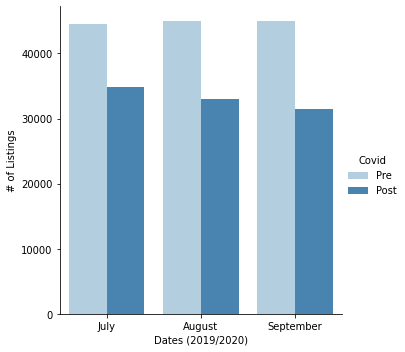

In [6]:
### Volume of Listings

listing = pd.pivot_table(data = workingdata, 
               index = ['Scrape Date'],
               values = 'id', 
               aggfunc = 'count').reset_index()

listing['Covid']=['Pre','Pre','Pre','Post','Post','Post']
listing['Month']=['July','August','September','July','August','September']

plt.figure(figsize=(15,8))
fig = sns.catplot(
    data=listing, 
    kind="bar",
    x='Month', 
    y='id', 
    hue="Covid",
    palette="Blues",
)

fig.set(xlabel='Dates (2019/2020)', ylabel='# of Listings')
plt.show()

In [7]:
listing

,Scrape Date,id,Covid,Month
0,2019- 07,44570,Pre,July
1,2019- 08,44938,Pre,August
2,2019- 09,44986,Pre,September
3,2020- 07,34900,Post,July
4,2020- 08,33078,Post,August
5,2020- 09,31536,Post,September


<Figure size 1080x576 with 0 Axes>

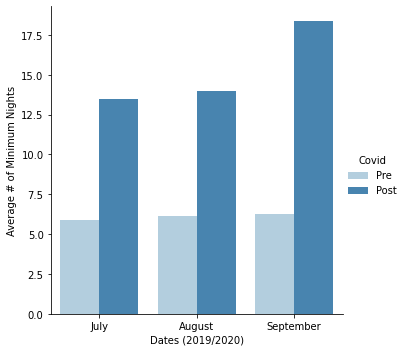

In [19]:
# Min Nights
mins = pd.pivot_table(data = workingdata, 
               index = ['Scrape Date'],
               values = 'minimum_nights', 
               aggfunc = 'mean').reset_index()

mins['Covid']=['Pre','Pre','Pre','Post','Post','Post']
mins['Month']=['July','August','September','July','August','September']

plt.figure(figsize=(15,8))
fig = sns.catplot(
    data=mins, 
    kind="bar",
    x='Month', 
    y='minimum_nights', 
    hue="Covid",
    palette="Blues"
)

fig.set(xlabel='Dates (2019/2020)', ylabel='Average # of Minimum Nights')
plt.show()

<Figure size 1080x576 with 0 Axes>

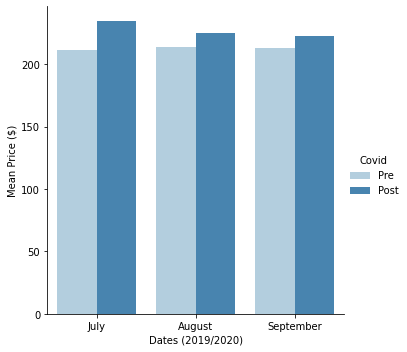

In [20]:
### Volume of Listings

prices = pd.pivot_table(data = workingdata, 
               index = ['Scrape Date'],
               values = 'price', 
               aggfunc = 'mean').reset_index()

prices['Covid']=['Pre','Pre','Pre','Post','Post','Post']
prices['Month']=['July','August','September','July','August','September']

plt.figure(figsize=(15,8))
fig = sns.catplot(
    data=prices, 
    kind="bar",
    x='Month', 
    y='price', 
    hue="Covid",
    palette="Blues"
)

fig.set(xlabel='Dates (2019/2020)', ylabel='Mean Price ($)')
plt.show()

**Slide 2 Visuals**

In [21]:
top5hoods = data[data.neighbourhood.isin(data.neighbourhood.value_counts().head().index)]

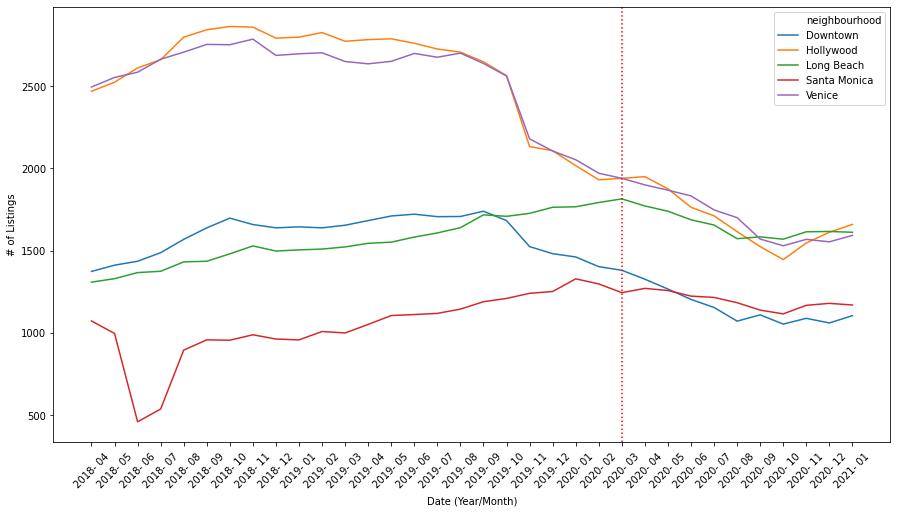

In [22]:
## Volume

top5monthly_listings = pd.pivot_table(top5hoods, index = ['Scrape Date','neighbourhood'],
                                       values='id',aggfunc = 'count').reset_index()
top5monthly_listings=top5monthly_listings.iloc[60:,:]

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=top5monthly_listings,x='Scrape Date',y='id', hue='neighbourhood')
plt.xticks(rotation=45)
covid  = plt.axvline(23, color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='# of Listings')
plt.show()

In [23]:
pd.set_option('display.max_rows', None)

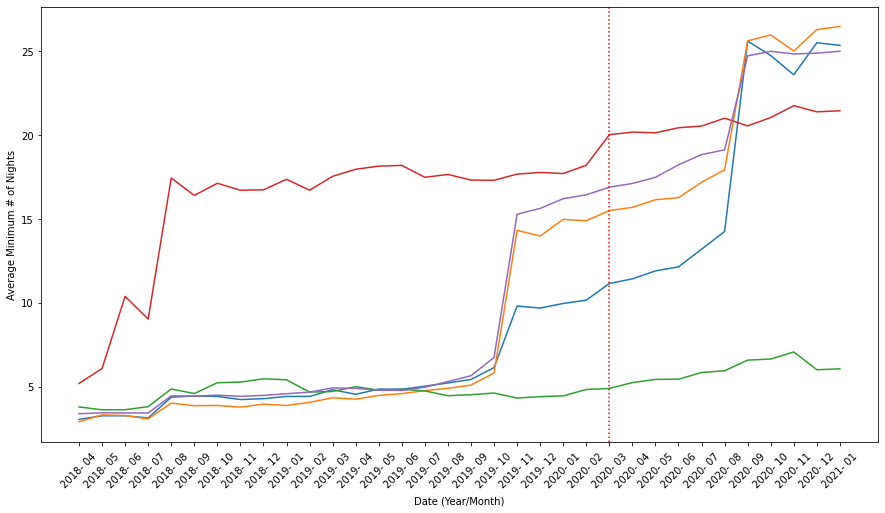

In [24]:
## Minimum Nights

top5monthly_min = pd.pivot_table(top5hoods, index = ['Scrape Date','neighbourhood'],
                                       values='minimum_nights',aggfunc = 'mean').reset_index()
top5monthly_min=top5monthly_min.iloc[60:,:]

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=top5monthly_min,x='Scrape Date',y='minimum_nights', hue='neighbourhood')
plt.xticks(rotation=45)
covid  = plt.axvline(23, color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='Average Minimum # of Nights')
fig.legend_.remove()


plt.show()

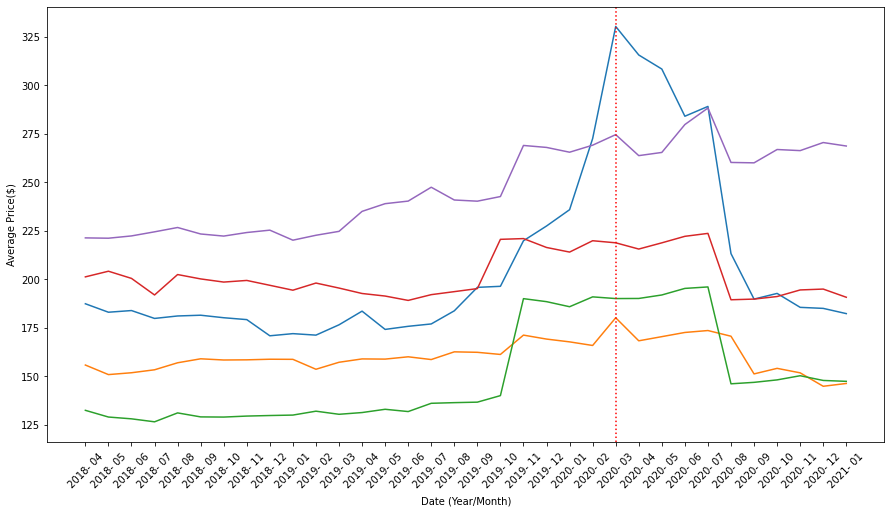

In [25]:
## Price

top5monthly_price = pd.pivot_table(top5hoods, index = ['Scrape Date','neighbourhood'],
                                       values='price',aggfunc = 'mean').reset_index()
top5monthly_price=top5monthly_price.iloc[60:,:]

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=top5monthly_price,x='Scrape Date',y='price', hue='neighbourhood')
plt.xticks(rotation=45)
covid  = plt.axvline(23, color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='Average Price($)')
fig.legend_.remove()


plt.show()

**Slide 3**

In [60]:
data = pd.read_csv('Combined Listing Data [Summary].csv')
data.drop(columns='Unnamed: 0',inplace=True)

/Users/adamtassabehji/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
# Engineering Date 

data['Date'] = data['Scrape File'].str[12:19]
data['Date'] = data['Date'].str.replace('_','')
data2 = data.copy()
data2.Date = pd.to_numeric(data2.Date)
pre_covid = data2[(data2.Date<202003)&(data2.Date>=201804)]
post_covid = data2[data2.Date>=202003]
data2['Covid'] = np.where(data2.Date>=202003,1,0)
data2 = data2[data2.Date>=201804]

In [62]:
##
print(smf.ols(formula='minimum_nights~ Covid',data=data2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                 3.872e+04
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:55:56   Log-Likelihood:            -6.2078e+06
No. Observations:             1350694   AIC:                         1.242e+07
Df Residuals:                 1350692   BIC:                         1.242e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1944      0.024    255.259      0.0

In [63]:
print(smf.ols(formula='price ~ Covid',data=data2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     355.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.29e-79
Time:                        20:55:56   Log-Likelihood:            -1.0495e+07
No. Observations:             1350694   AIC:                         2.099e+07
Df Residuals:                 1350692   BIC:                         2.099e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.0876      0.580    353.472      0.0

In [64]:
## Same for top 5 hoods

top5hoods = data2[data2.neighbourhood.isin(data2.neighbourhood.value_counts().head().index)]
top5hoods.neighbourhood.unique()

array(['Santa Monica', 'Hollywood', 'Downtown', 'Venice', 'Long Beach'],
      dtype=object)

In [65]:
Venice=top5hoods[top5hoods.neighbourhood=='Venice']
Hollywood=top5hoods[top5hoods.neighbourhood=='Hollywood']
long=top5hoods[top5hoods.neighbourhood=='Long Beach']
Downtown=top5hoods[top5hoods.neighbourhood=='Downtown']
santa=top5hoods[top5hoods.neighbourhood=='Santa Monica']

In [66]:
## Venice

print(smf.ols(formula='minimum_nights ~ Covid',data=Venice).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:56:40   Log-Likelihood:            -3.3224e+05
No. Observations:               77713   AIC:                         6.645e+05
Df Residuals:                   77711   BIC:                         6.645e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1811      0.072     86.237      0.0

In [67]:
print(smf.ols(formula='price ~ Covid',data=Venice).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           3.22e-31
Time:                        20:56:40   Log-Likelihood:            -5.6671e+05
No. Observations:               77713   AIC:                         1.133e+06
Df Residuals:                   77711   BIC:                         1.133e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.9713      1.465    160.432      0.0

In [68]:
## hollywood

In [69]:
print(smf.ols(formula='minimum_nights ~ Covid',data=Hollywood).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                 1.174e+04
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:56:41   Log-Likelihood:            -3.3118e+05
No. Observations:               78631   AIC:                         6.624e+05
Df Residuals:                   78629   BIC:                         6.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5355      0.067     83.030      0.0

In [70]:
print(smf.ols(formula='price ~ Covid',data=Hollywood).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.902
Date:                Mon, 22 Feb 2021   Prob (F-statistic):              0.168
Time:                        20:56:41   Log-Likelihood:            -5.6706e+05
No. Observations:               78631   AIC:                         1.134e+06
Df Residuals:                   78629   BIC:                         1.134e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.0901      1.339    118.828      0.0

In [71]:
print(smf.ols(formula='minimum_nights ~ Covid',data=long).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     55.24
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.08e-13
Time:                        20:56:42   Log-Likelihood:            -2.3502e+05
No. Observations:               53943   AIC:                         4.700e+05
Df Residuals:                   53941   BIC:                         4.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6168      0.100     46.214      0.0

In [72]:
print(smf.ols(formula='price ~ Covid',data=long).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     41.76
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.04e-10
Time:                        20:56:42   Log-Likelihood:            -4.0505e+05
No. Observations:               53943   AIC:                         8.101e+05
Df Residuals:                   53941   BIC:                         8.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.0294      2.336     61.226      0.0

In [73]:
print(smf.ols(formula='minimum_nights ~ Covid',data=Downtown).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3028.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -2.2277e+05
No. Observations:               49504   AIC:                         4.455e+05
Df Residuals:                   49502   BIC:                         4.456e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3371      0.114     46.926      0.0

In [74]:
print(smf.ols(formula='price ~ Covid',data=Downtown).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           3.00e-31
Time:                        20:56:42   Log-Likelihood:            -3.7679e+05
No. Observations:               49504   AIC:                         7.536e+05
Df Residuals:                   49502   BIC:                         7.536e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    189.7740      2.554     74.318      0.0

In [75]:
print(smf.ols(formula='minimum_nights ~ Covid',data=santa).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         minimum_nights   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     255.9
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.15e-57
Time:                        20:56:43   Log-Likelihood:            -1.7417e+05
No. Observations:               37022   AIC:                         3.483e+05
Df Residuals:                   37020   BIC:                         3.484e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1272      0.173     93.201      0.0

In [76]:
print(smf.ols(formula='price ~ Covid',data=santa).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4255
Date:                Mon, 22 Feb 2021   Prob (F-statistic):              0.514
Time:                        20:56:43   Log-Likelihood:            -2.7405e+05
No. Observations:               37022   AIC:                         5.481e+05
Df Residuals:                   37020   BIC:                         5.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.0597      2.569     78.640      0.0

In [80]:
hoods

array(['Santa Monica', 'Hollywood', 'Downtown', 'Venice', 'Long Beach'],
      dtype=object)

In [84]:
hoods=top5hoods.neighbourhood.unique()
nights=[ 4.6404,14.8351,12.2950,14.6383,1.2769 ]
prices=[2.8099 ,3.7916,58.3727 ,34.6133 ,25.9589 ] 

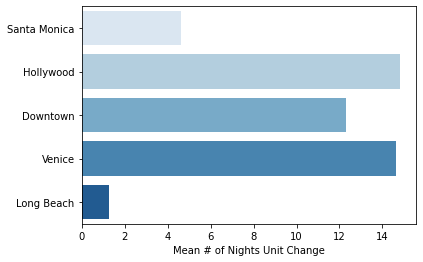

In [85]:
fig=sns.barplot(x = nights,
            y = hoods,
            palette='Blues',
)

fig.set(xlabel='Mean # of Nights Unit Change')
plt.show()

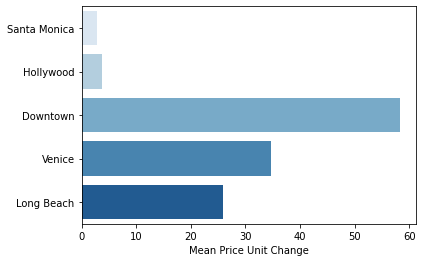

In [86]:
fig=sns.barplot(x = prices,
            y = hoods,
            palette='Blues',
)

fig.set(xlabel='Mean Price Unit Change')
plt.show()